

<h1 ><center><b>Credit Card Fraud Detection</b></center></h1>

<h3><center><i> Predicting fraudulent credit card transactions using machine learning.</i></center></h3> 

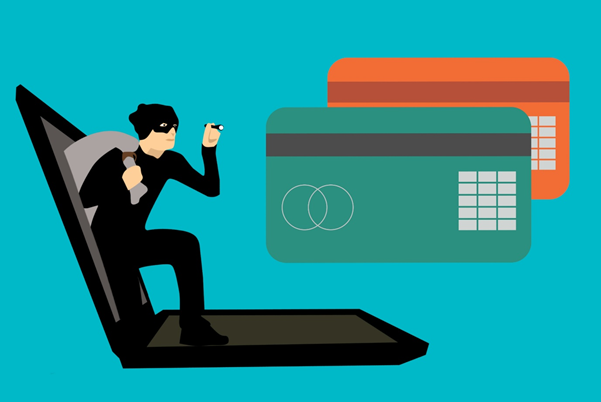

### Importing all the necessary libraries

In [1]:
# for data manipulation
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# for ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# for displaying all the columns
pd.set_option('display.max_columns',None)

# for data preprocessing
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# for balancing the dataset
from imblearn.over_sampling import SMOTE

# for model training and predicting
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier

# for evaluating performance of models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

# for hyperparameter tuning
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.model_selection import RandomizedSearchCV

### Loading and reading the dataset

#### Train dataset

In [2]:
train_df = pd.read_csv("fraudTrain.csv")
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


#### Test dataset

In [3]:
test_df = pd.read_csv("fraudTest.csv")
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


### Shape of the dataset

In [4]:
train_shape = train_df.shape
test_shape = test_df.shape
print(f'There are {train_shape[0]} rows and {train_shape[1]} columns in the training dataset')
print(f'There are {test_shape[0]} rows and {test_shape[1]} columns in the test dataset')

There are 1296675 rows and 23 columns in the training dataset
There are 555719 rows and 23 columns in the test dataset


### Train vs Test Ratio

In [5]:
Train_perc = round(len(train_df) / (len(train_df) + len(test_df)) *100)
Test_perc = round(len(test_df) / (len(train_df) + len(test_df)) * 100)

print(f"Train vs test ratio = {Train_perc} : {Test_perc}")

Train vs test ratio = 70 : 30


### Combining the Training and Test Datasets ( for data preprocessing )

In [6]:
# creating the test and train label in the respective datasets, so that we can later on split the train-test data set 
# after preprocessing based on this column.

train_df['data'] = 'train' 
test_df['data'] = 'test'

In [7]:
## concatenating both the datasets

df = pd.concat([train_df,test_df], axis = 0)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,data
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,train
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,train
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,train
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,train
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,train


### Shape of combined dataset

In [8]:
shape = df.shape
print(f'There are {shape[0]} rows and {shape[1]} columns in the combined dataset')

There are 1852394 rows and 24 columns in the combined dataset


### Columns of the dataset

In [9]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'data'],
      dtype='object')

### Basic information about the dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

In [11]:
# Out of 23 columns(apart from data column), 5 columns are of float, 6 columns are of integer and 12 columns are of 
# object datatype.

### Unique number of values in each column

In [12]:
df.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1819551
cc_num                       999
merchant                     693
category                      14
amt                        60616
first                        355
last                         486
gender                         2
street                       999
city                         906
state                         51
zip                          985
lat                          983
long                         983
city_pop                     891
job                          497
dob                          984
trans_num                1852394
unix_time                1819583
merch_lat                1754157
merch_long               1809753
is_fraud                       2
data                           2
dtype: int64

### Statistical summary of the dataset

In [13]:
# Statistical summary of the numeric columns

df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [14]:
# Statistical summary of the object columns

df.describe(include="object")

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num,data
count,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394,1852394
unique,1819551,693,14,355,486,2,999,906,51,497,984,1852394,2
top,2019-04-22 16:02:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,444 Robert Mews,Birmingham,TX,Film/video editor,1977-03-23,0b242abb623afc578575680df30655b9,train
freq,4,6262,188029,38112,40940,1014749,4392,8040,135269,13898,8044,1,1296675


<h1><center><b><td>Exploratory Data Analysis</td></b></center></h1>

### Checking for duplicate observations

In [15]:
df.duplicated().sum()

0

In [16]:
# There are no duplicate observations in the dataset.

### Checking for missing values

In [17]:
df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
data                     0
dtype: int64

In [18]:
# There are no missing values in the dataset.

## Fraudulent Transactions Analysis

### Fraudulent transactions rate

In [19]:
rate = len(df[df['is_fraud']==1]) / len(df) * 100
print(f"Fraudulent transactions rate = {round(rate,2)} %")

Fraudulent transactions rate = 0.52 %


### Proportion of fraudulent and legitimate transactions

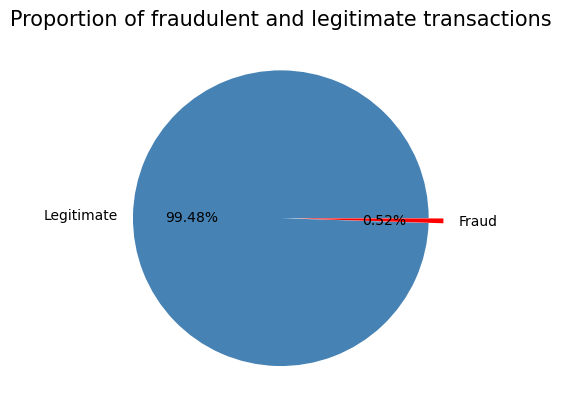

In [20]:
data = [df.is_fraud.value_counts()[0], df.is_fraud.value_counts()[1]]
keys = ["Legitimate", "Fraud"]
explode = [0, 0.1]
palette_color = [ "steelblue","red"]
plt.pie(data, labels=keys, colors=palette_color,
        explode=explode, autopct='%.2f%%')
plt.title("Proportion of fraudulent and legitimate transactions", size = 15)
plt.show()

In [21]:
# As only 0.52% of the total transactions are fraudulent, it indicates a highly imbalanced dataset.

### Feature Engineering

##### Type-casting features

In [22]:
# Columns like trans_date_trans_time and dob are of object datatype which need to be converted to Datetime format.
# So that further analysis on these columns becomes possible

In [23]:
df["trans_date_trans_time"] = pd.to_datetime(df["trans_date_trans_time"])
df["dob"] = pd.to_datetime(df["dob"])

##### Extracting required features from "trans_date_trans_time" feature

In [24]:
## 1. Extracting Date from "trans_date_trans_time" column
df['trans_date'] = df['trans_date_trans_time'].dt.date

## 2. Extracting Year from "trans_date_trans_time" column
df['trans_year'] = df['trans_date_trans_time'].dt.year

## 3. Extracting Day and Month names from "trans_date_trans_time" column
df['trans_month'] = df['trans_date_trans_time'].dt.month_name()  # for visualizing the data
df['trans_day'] = df['trans_date_trans_time'].dt.day_name()      # for visualizing the data

## 4. Extracting Day from "trans_date_trans_time" column
df['month'] = df['trans_date_trans_time'].dt.month

## 5. Extracting Month from "trans_date_trans_time" column
df['day'] = df['trans_date_trans_time'].dt.day

## 6. Extracting Hour from "trans_date_trans_time" column
df['hour'] = df['trans_date_trans_time'].dt.hour

##### Creating new features 

In [25]:
## Calculating Age of the customer - By subtracting "dob" feature from "trans_date" (extracted) feature.

In [26]:
df["trans_date"] = pd.to_datetime(df["trans_date"])
df["Age"] = (df['trans_date'] - df["dob"]).astype('timedelta64[Y]')

In [27]:
## Calculating distance between customer location and merchant location

In [28]:
df["lat_distance"] = abs(df['merch_lat']-df['lat'])
df["long_distance"] = abs(df['merch_long']-df['long'])

In [29]:
## Number of times each credit card has been used.

In [30]:
df.groupby(['cc_num'])['cc_num'].count()

cc_num
60416207185            2196
60422928733            2200
60423098130             738
60427851591             743
60487002085             735
                       ... 
4958589671582726883    2191
4973530368125489546    1467
4980323467523543940     736
4989847570577635369    1471
4992346398065154184    2922
Name: cc_num, Length: 999, dtype: int64

**Inference**
- There are total 999 credit cards in use. 
- Each credit card has been used multiple times. 
- Therefore, it is essential to understand the gap between the two transactions with the help of another feature "Unix_time".

##### unix_time - a way of representing a timestamp by representing the time as the number of seconds since January 1st, 1970 at 00:00:00 UTC. It provides a convenient zero point for timestamps that is common with all Unix systems.

In [31]:
# sorting the dataframe on cc_num and unix_time

df.sort_values(by = ['cc_num','unix_time'], ascending = True, inplace = True)

In [32]:
# unix_time for the previous transaction using the shift method in pandas and 
# filling null values(created) with number of seconds in a day(86400).

df['unix_time_prev_trans'] = df.groupby(by = ['cc_num'])['unix_time'].shift(1)
df['unix_time_prev_trans'].fillna(df['unix_time'] - 86400, inplace = True)

# calculatig the time gap between the previous and current transaction - converting the seconds into minutes

df['time_gap'] = (df['unix_time'] - df['unix_time_prev_trans']) // 60 
# gives time gap (in minutes) between two transactions done using each credit card.

##### Dropping redundant features

In [33]:
df.drop(columns=["Unnamed: 0", "cc_num", "trans_date_trans_time", "first", "last", "trans_num","unix_time", "dob", 
                 "unix_time_prev_trans", "lat", "long", "trans_date", "merch_lat", "merch_long"], axis = 1, inplace=True)

In [34]:
df.head(1)

,merchant,category,amt,gender,street,city,state,zip,city_pop,job,is_fraud,data,trans_year,trans_month,trans_day,month,day,hour,Age,lat_distance,long_distance,time_gap
1017,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,F,9886 Anita Drive,Fort Washakie,WY,82514,1645,Information systems manager,0,train,2019,January,Tuesday,1,1,12,32.0,0.969911,0.845504,1440.0


## Univariate Analysis

### Extracting categorical columns

In [35]:
cat_cols=[]
for i in df.columns:
    if (df[i].nunique() <= 15):
        cat_cols.append(i)
cat_cols =  cat_cols[:-1] 
cat_cols

['category',
 'gender',
 'is_fraud',
 'data',
 'trans_year',
 'trans_month',
 'trans_day']

### Visualizing categorical columns

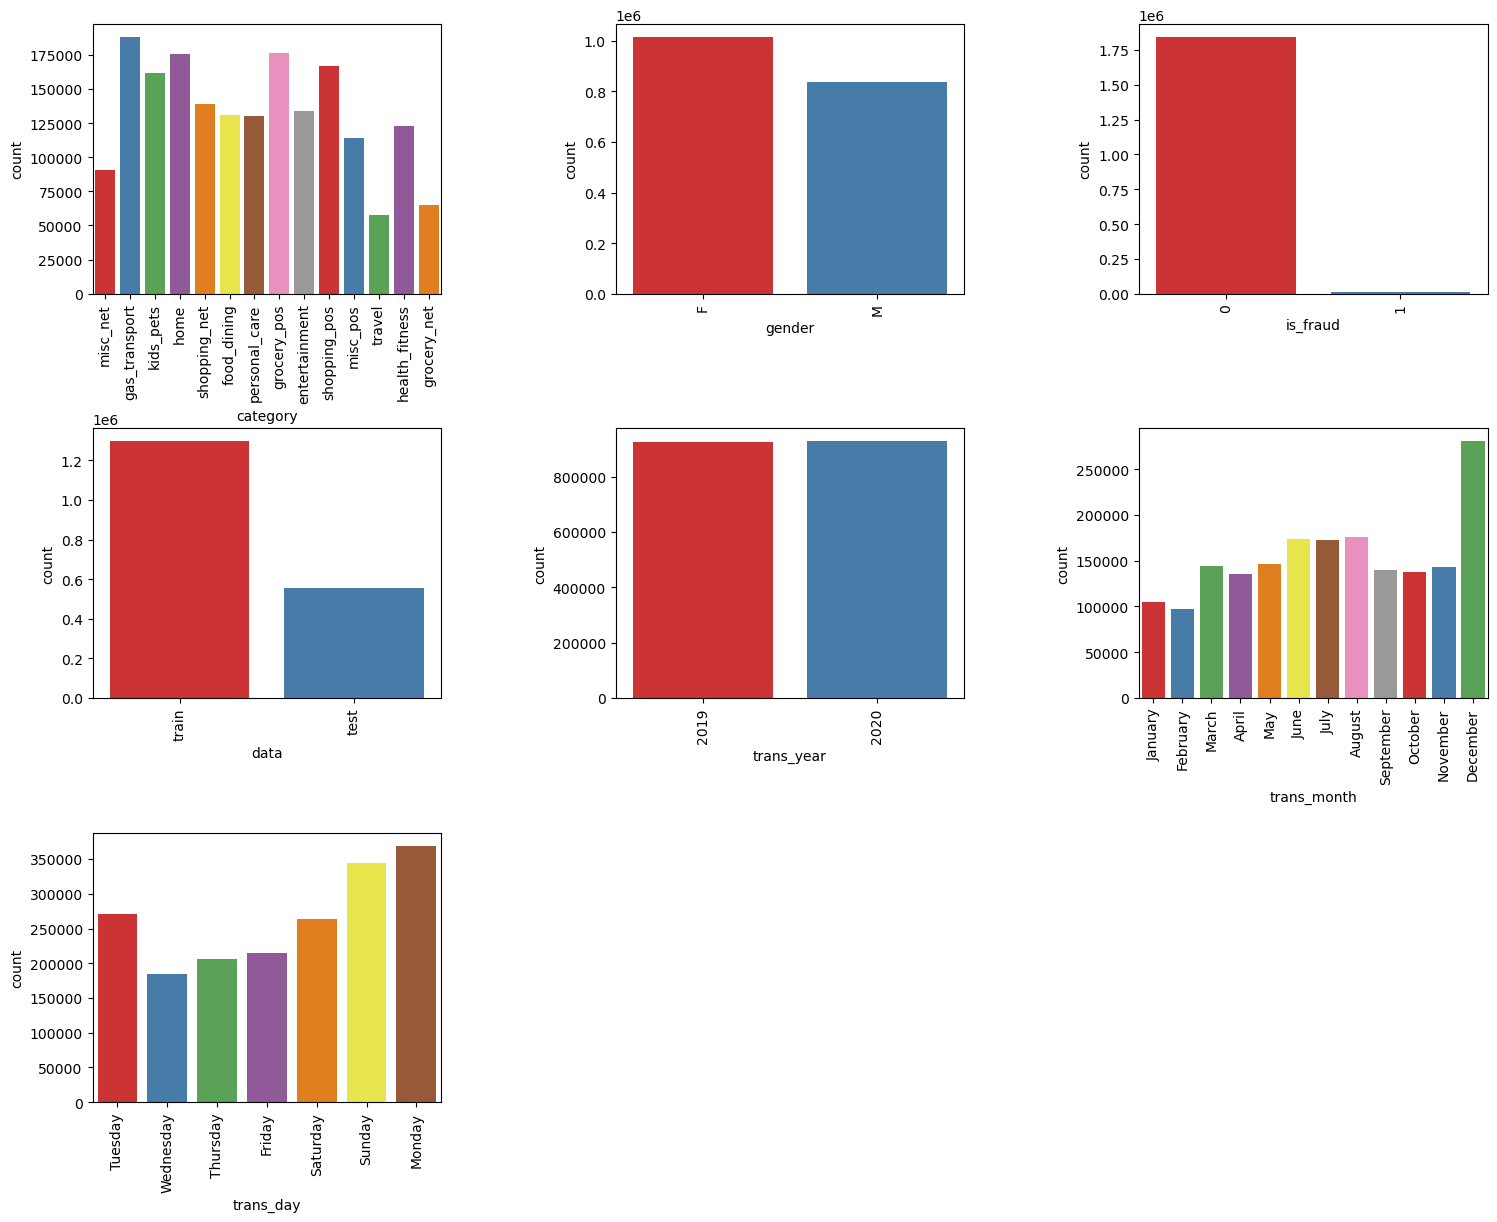

In [36]:
plt.figure(figsize = (18,14))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

for i in range(len(cat_cols)):
    plt.subplot(3,3,i+1)
    plt.xticks(rotation=90)
    sns.countplot(df[cat_cols[i]], palette = 'Set1')
    
plt.show()

##### Insights:
- Most of the credit card transactions fall into the category of gas_transport, followed by grocery_pos and home.
- Out of all the credit card transactions, transactions made by females are more in number than males(surprisingly).
- Most of the credit card transactions are legitimate.
- There is no difference in the number of credit card transactions done in 2019 and 2020.
- Maximum credit card transactions are done in the month of December(may be due to the vacation/ festive time).
- Weekly analysis shows that most of the transactions are done on Monday, followed by Sunday and Saturday.

### Extracting numerical columns

In [37]:
num_cols = ['amt', 'zip', 'city_pop', 'hour', 'lat_distance', 'long_distance', 'time_gap']

num_cols 

['amt', 'zip', 'city_pop', 'hour', 'lat_distance', 'long_distance', 'time_gap']

### Visualizing numerical columns

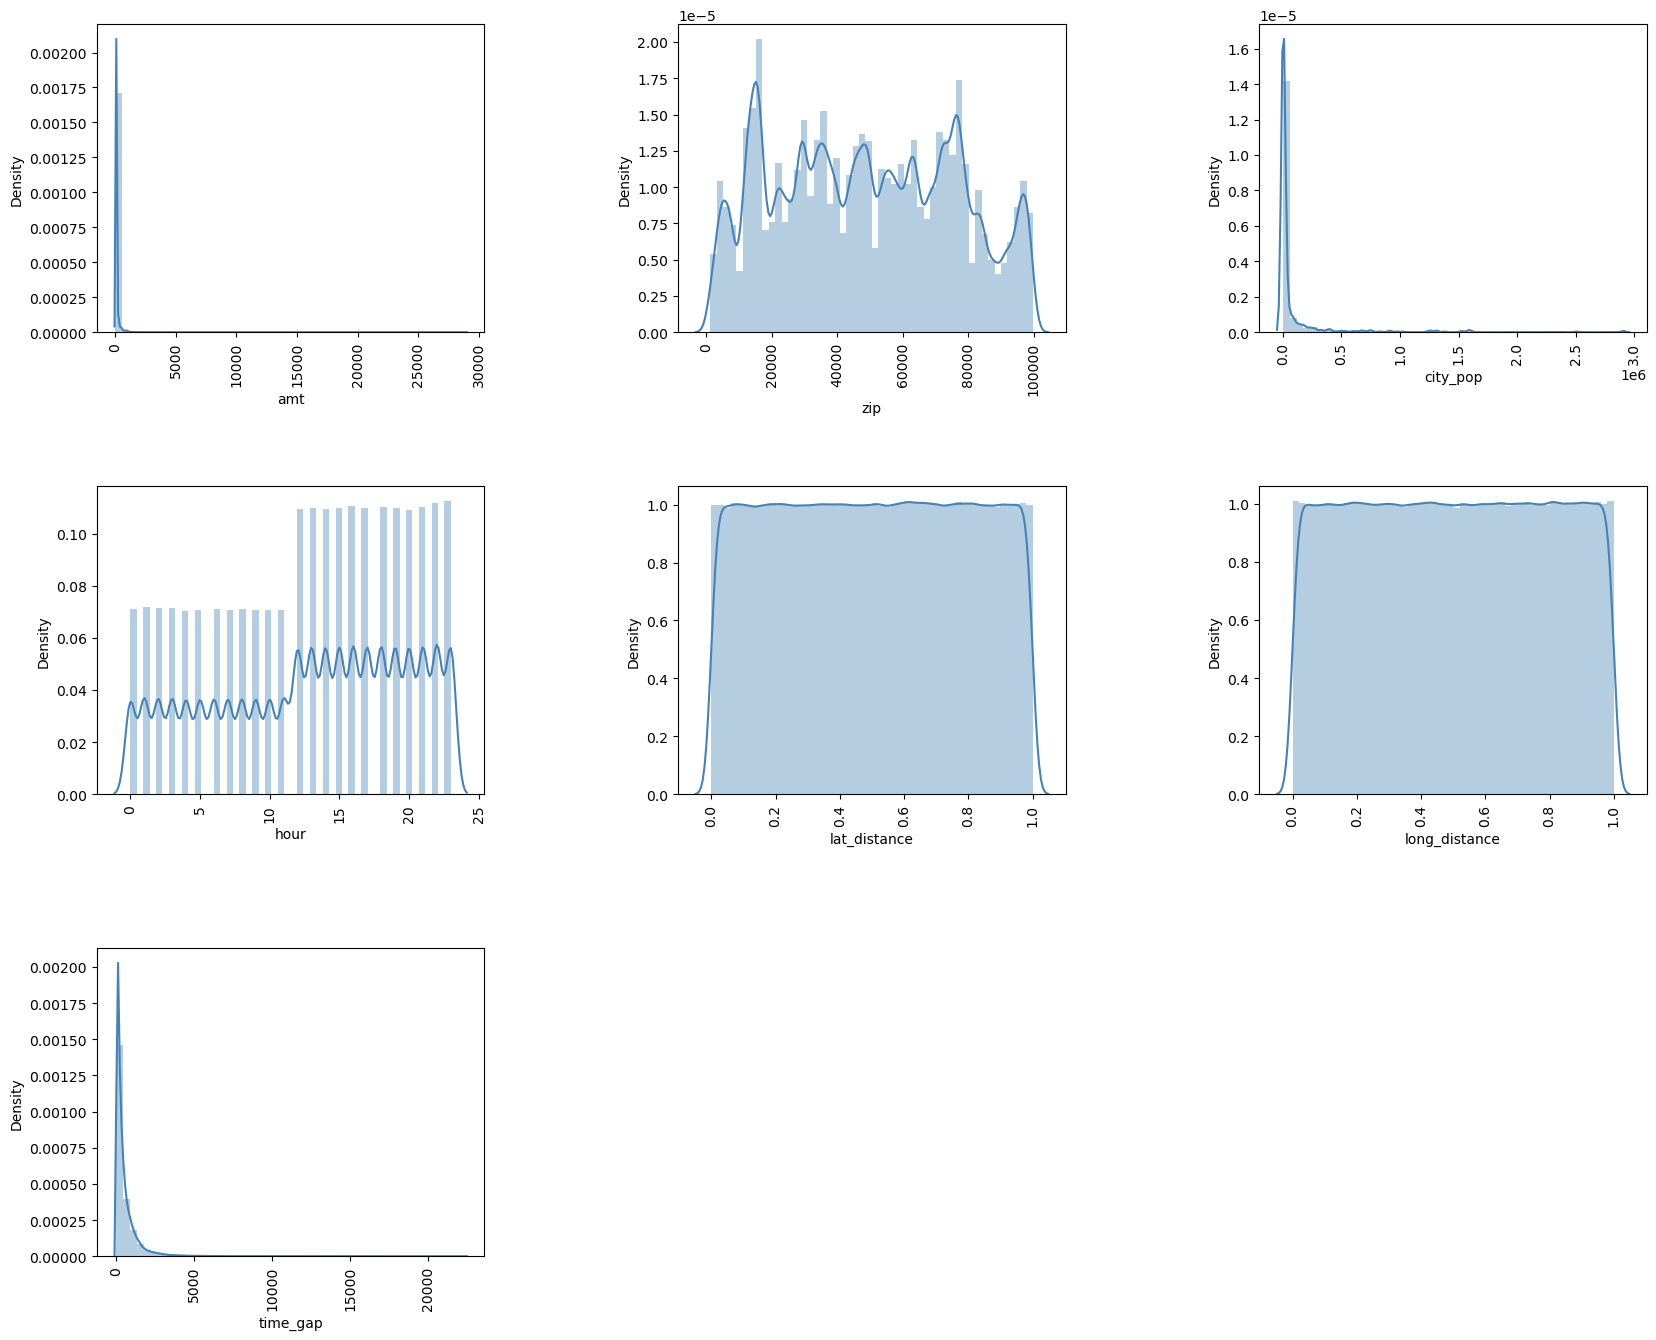

In [38]:
plt.figure(figsize = (20,16))
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

for i in range(len(num_cols)):
    plt.subplot(3,3,i+1)
    plt.xticks(rotation=90)
    sns.distplot(df[num_cols[i]], color="steelblue")
    
plt.show()

##### Insights:
- Analyses of amt, city_pop and time_gap show the skewed distribution.
- The more number of transactions are done in the later half of the day(after 3 PM)
- Analyses of lat and long distance show the uniform distribution of credit card transactions.

## Bivariate analysis

### Between categorical columns and Target variable

##### **Gender**

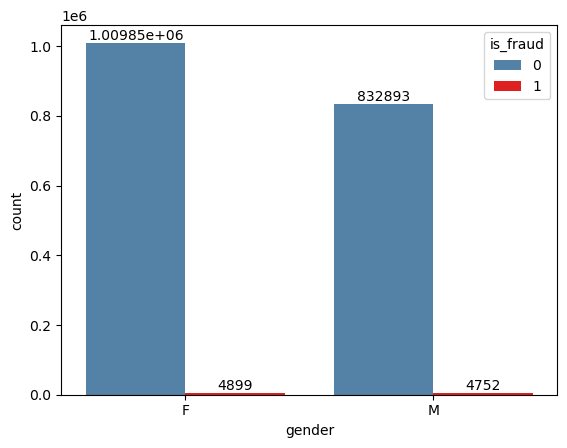

In [39]:
colors = ["steelblue","red"]
ax = sns.countplot(x = 'gender', hue = 'is_fraud', data = df, palette =colors)
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [40]:
# Maximum frauds have been done by Females.

##### Category

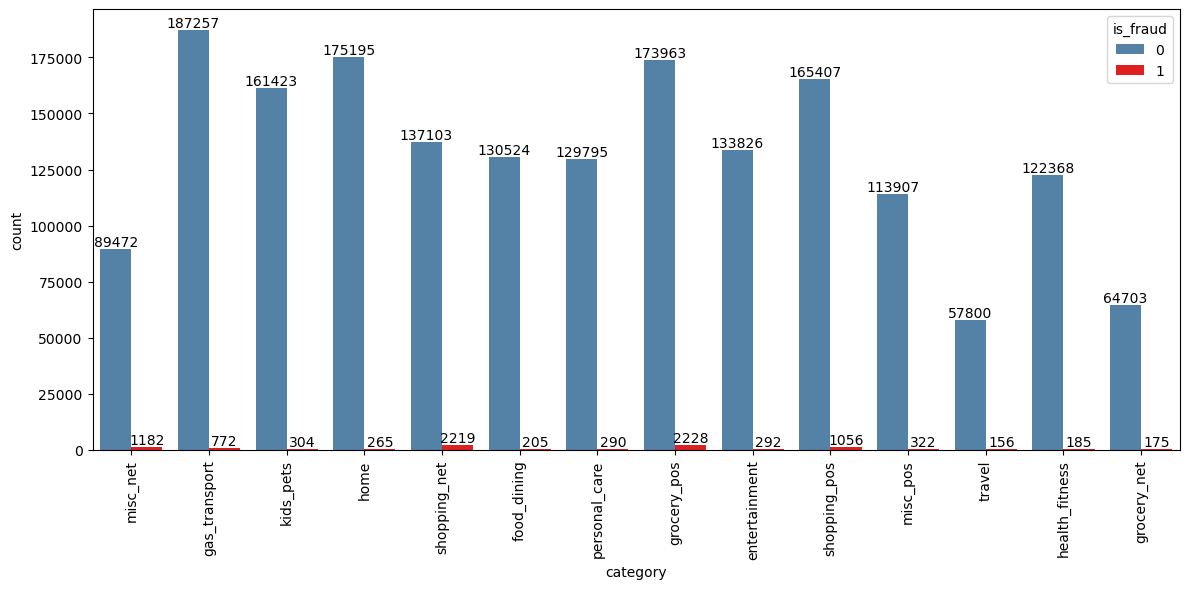

In [41]:
plt.figure(figsize = (12,6))
ax = sns.countplot(x = 'category', hue = 'is_fraud', data = df, palette =colors)
for i in ax.containers:
    ax.bar_label(i)
    plt.xticks(rotation = 90)
    plt.tight_layout()
plt.show()

In [42]:
# The maximum frauds have been done by the transactions of grocery_pos, followed by shopping_net.

##### Year

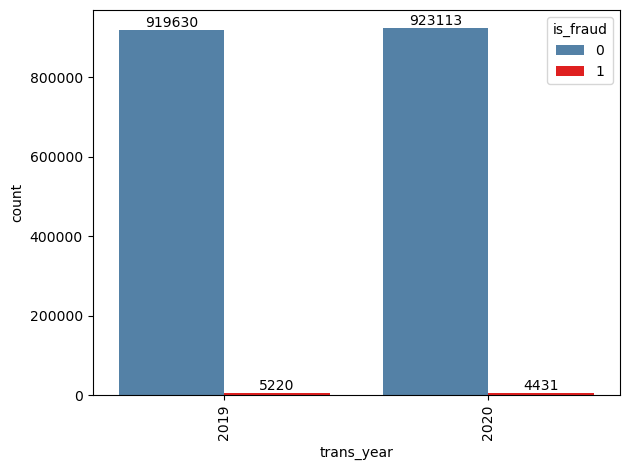

In [43]:
ax = sns.countplot(x = 'trans_year', hue = 'is_fraud', data = df, palette = colors)
for i in ax.containers:
    ax.bar_label(i)
    plt.xticks(rotation = 90)
    plt.tight_layout()
plt.show()

In [44]:
# The maximum frauds have been done in 2019.

##### Month

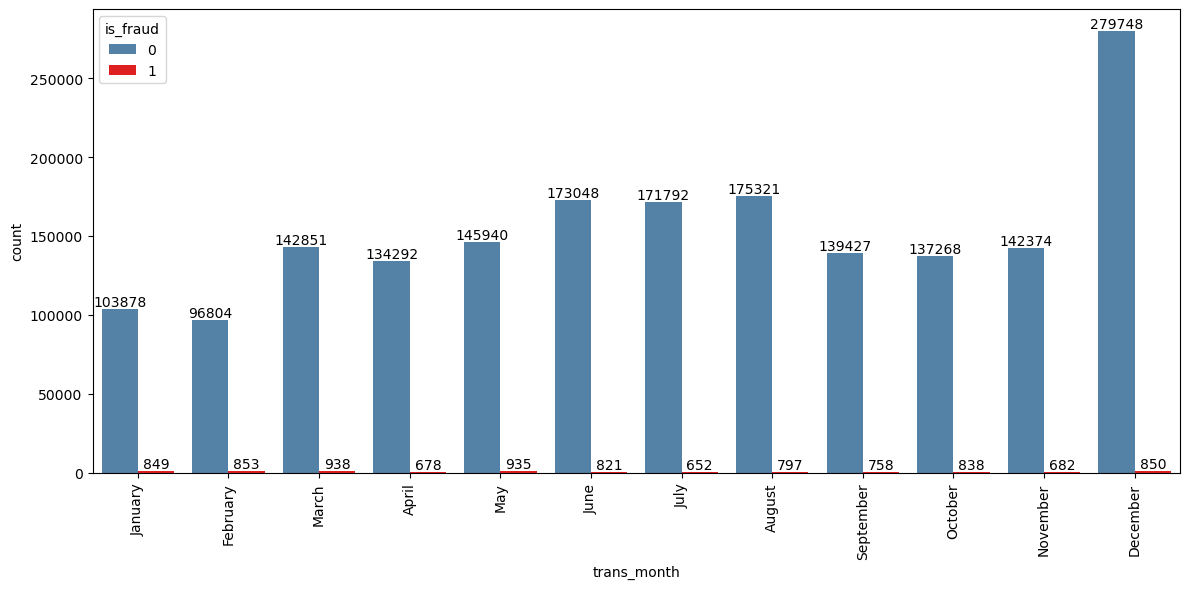

In [45]:
plt.figure(figsize = (12,6))

ax = sns.countplot(x = 'trans_month', hue = 'is_fraud', data = df, palette = colors)
for i in ax.containers:
    ax.bar_label(i)
    plt.xticks(rotation = 90)
    plt.tight_layout()
plt.show()

In [46]:
#  Although the maximum transactions have been made in the month of December, maximum frauds have been done in March, 
# followed by May.

##### Day

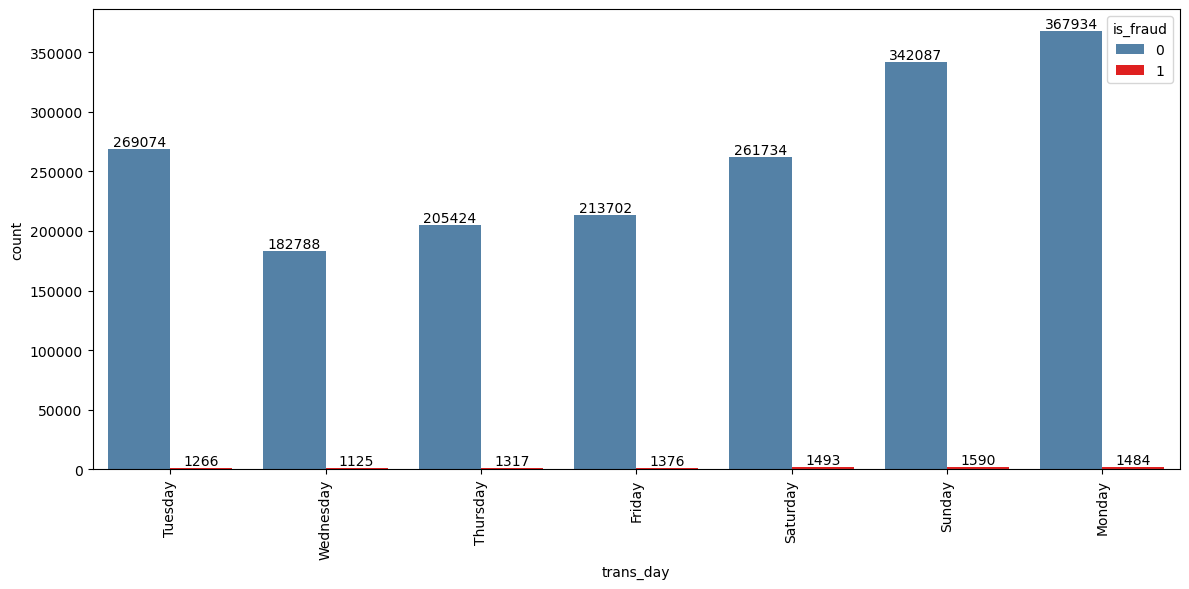

In [47]:
plt.figure(figsize = (12,6))

ax = sns.countplot(x = 'trans_day', hue = 'is_fraud', data = df, palette = colors)
for i in ax.containers:
    ax.bar_label(i)
    plt.xticks(rotation = 90)
    plt.tight_layout()
plt.show()

In [48]:
# Maximum number of frauds are recorded on weekend.

##### Hour

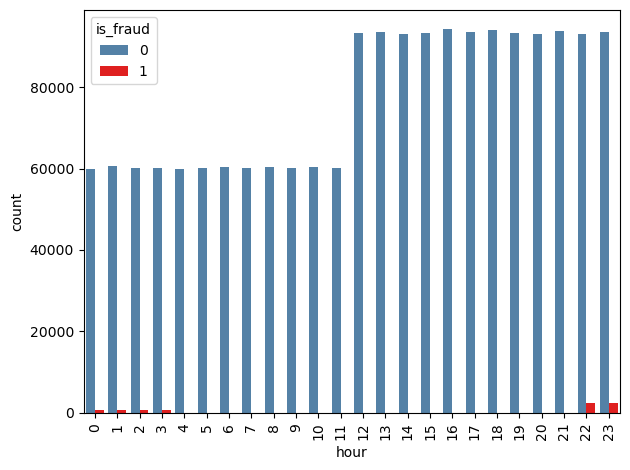

In [49]:
ax = sns.countplot(x = 'hour', hue = 'is_fraud', data = df, palette = colors)
for i in ax.containers:
#     ax.bar_label(i)
    plt.xticks(rotation = 90)
    plt.tight_layout()
plt.show()

In [50]:
# Maximum number of frauds are recorded either late night or early morning.

#### Separating fraud transactions for further analysis

In [51]:
## Fraud transactions

fraud_df = df[df["is_fraud"] == 1]

##### Merchant

In [52]:
# Frauds done by Top 10 Merchants

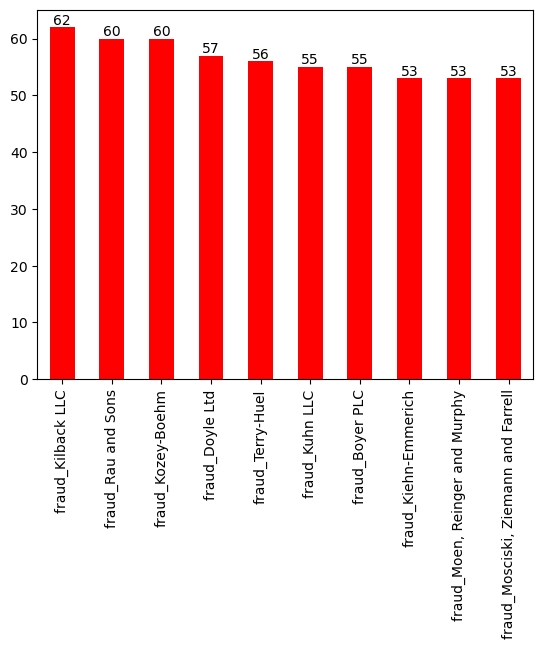

In [53]:
ax = fraud_df["merchant"].value_counts().head(10).plot(kind="bar", color= "red")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

##### Street

In [54]:
# Top 10 street names where maximum frauds are recorded.

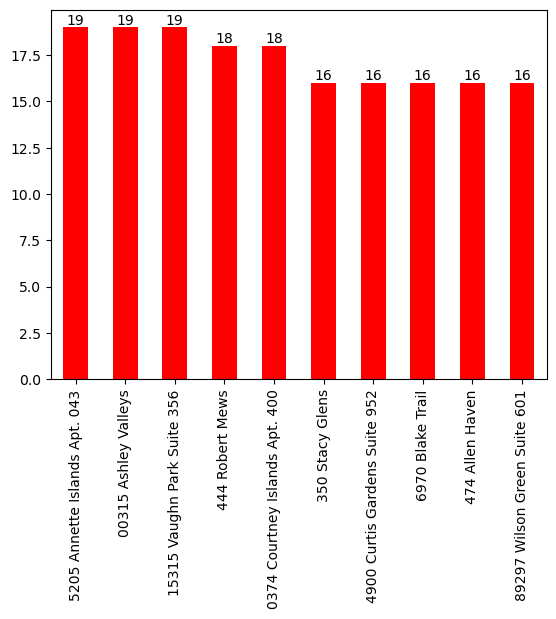

In [55]:
ax = fraud_df["street"].value_counts().head(10).plot(kind="bar", color= "red")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

##### City

In [56]:
# Top 10 cities with maximum frauds.

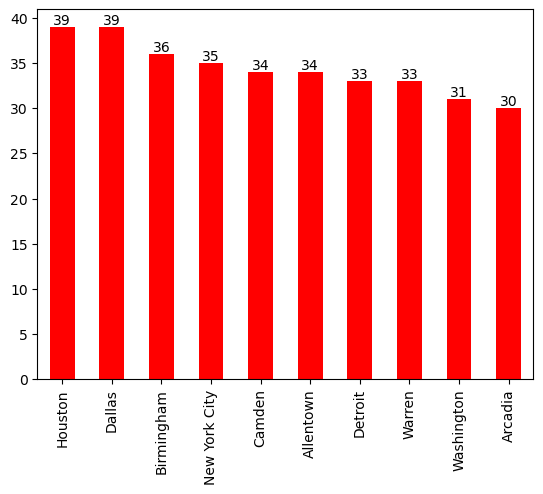

In [57]:
ax = fraud_df["city"].value_counts().head(10).plot(kind="bar", color= "red")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

##### State

In [58]:
# Top 10 States with maximum frauds.

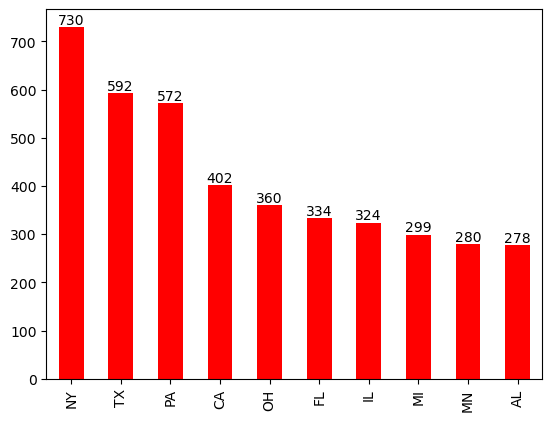

In [59]:
ax = fraud_df["state"].value_counts().head(10).plot(kind="bar", color= "red")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

##### Job

In [60]:
#  Top 10 Jobs with maximum frauds.

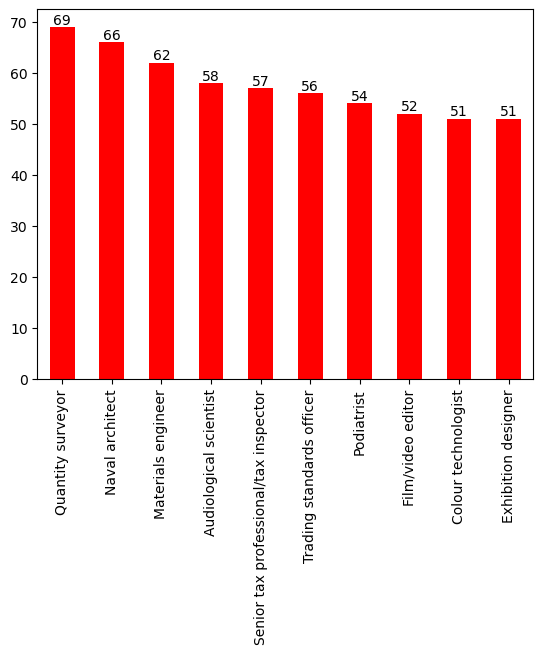

In [61]:
ax = fraud_df["job"].value_counts().head(10).plot(kind="bar", color= "red")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

##### Zip

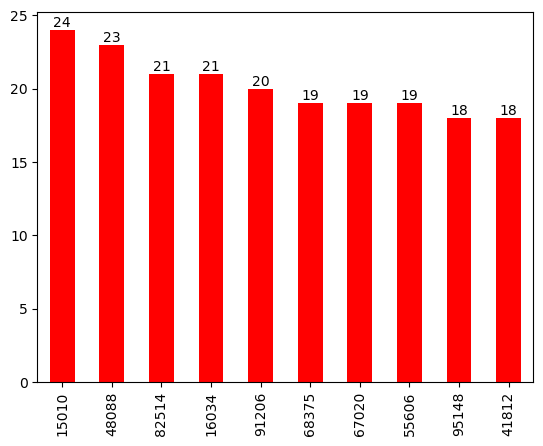

In [62]:
ax = fraud_df["zip"].value_counts().head(10).plot(kind="bar", color= "red")
for i in ax.containers:
    ax.bar_label(i)
plt.show()

### Between numerical columns and Target variable¶

##### Age

In [63]:
# Distribution of fraud transactions among different age-groups

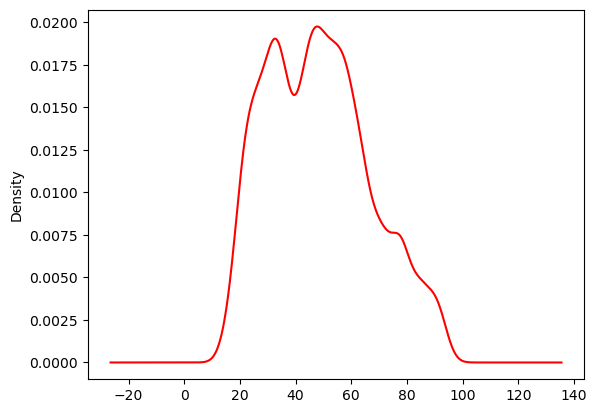

In [64]:
fraud_df["Age"].plot(kind="kde", color= "red")
plt.show()

In [65]:
# Maximum frauds have been done by people in the age-group of 45-60.

##### Amt

In [66]:
# Amt Distribution when transactions are fraud

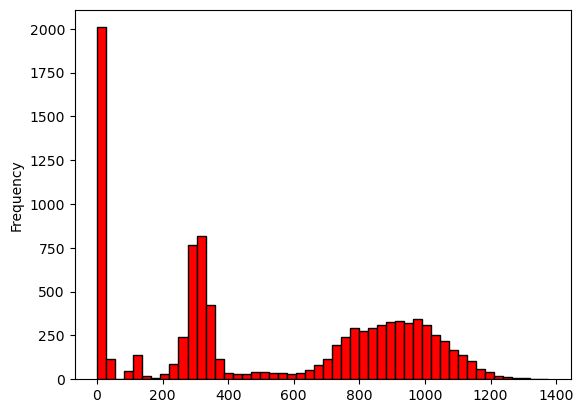

In [67]:
fraud_df["amt"].plot(kind="hist", bins = 50, edgecolor = "black", color= "red")
plt.show()

In [68]:
# Maximum frauds have been done by people having amount 

##### City pop

In [69]:
# Distribution of city population when transactions are fraud

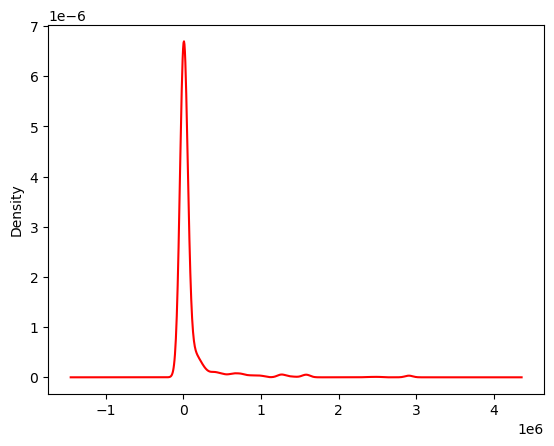

In [70]:
fraud_df["city_pop"].plot(kind="kde", color= "red")
plt.show()

##### Latitudinal distance

In [71]:
# Distribution of latitudinal distance when transactions are fraud

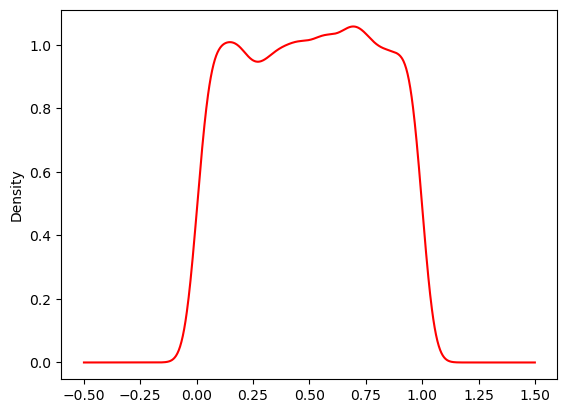

In [72]:
fraud_df["lat_distance"].plot(kind="kde", color= "red")
plt.show()


##### Longitudinal distance

In [73]:
# Distribution of longitudinal distance when transactions are fraud

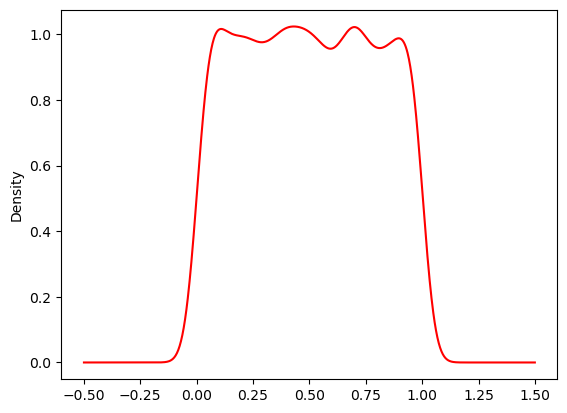

In [74]:
fraud_df["long_distance"].plot(kind="kde", color= "red")
plt.show()


##### time_gap

In [75]:
# Distribution of time gap between previous transactions and current transaction when transactions are fraud

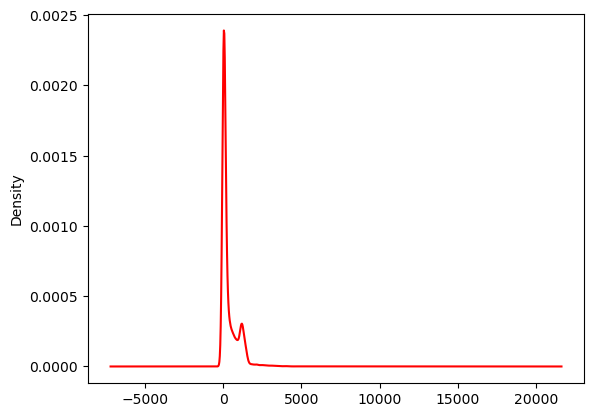

In [76]:
fraud_df["time_gap"].plot(kind="kde", color ='red')
plt.show()

## Multivariate Analysis

### Correlation among features

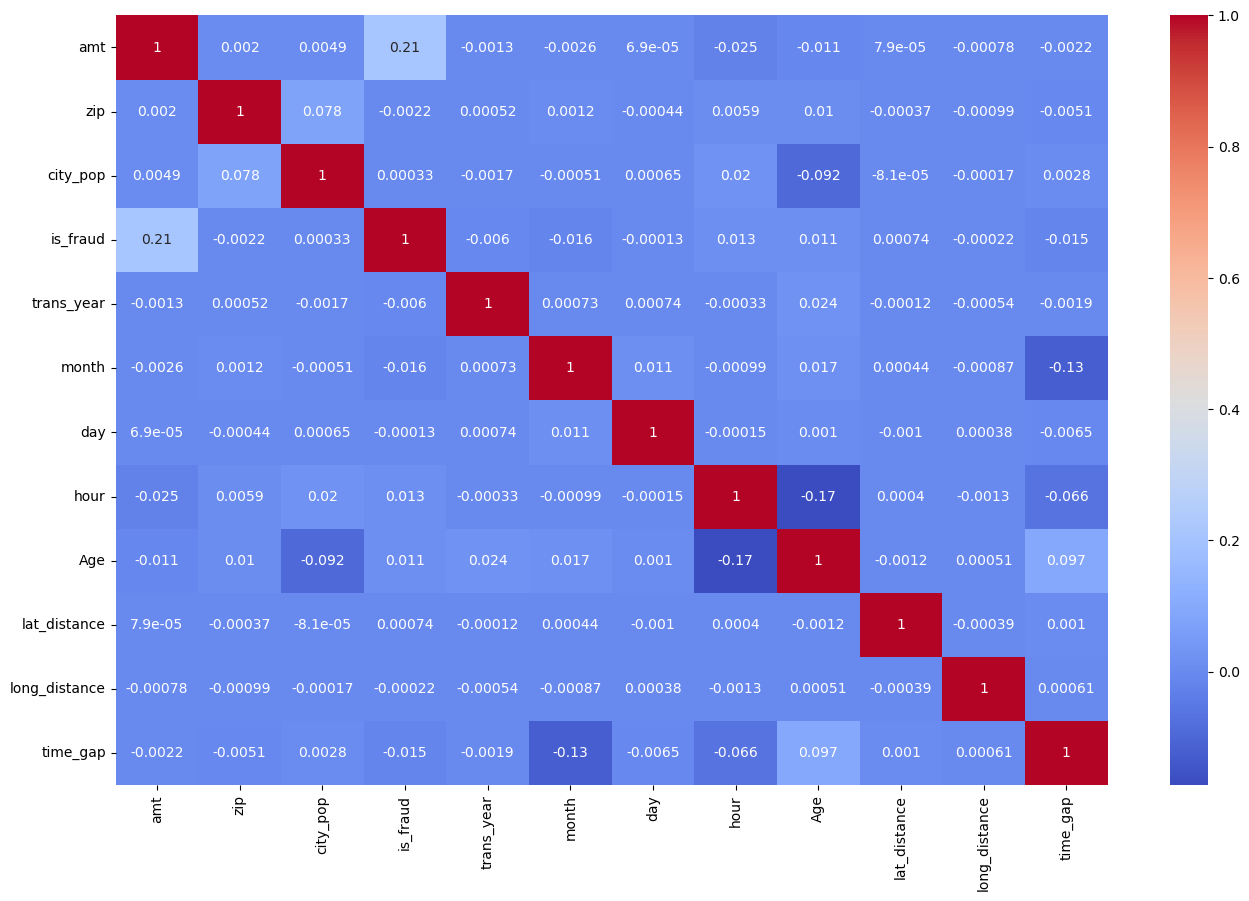

In [77]:
plt.figure(figsize=(16,10),dpi=100)
sns.heatmap(df.corr(), annot=True, cmap = 'coolwarm')
plt.show()

In [78]:
# There is no strong correlation between any of the features and target feature - is_fraud.
# Moreover, there are no signs of multicollinearity as well.

##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<h1><center><b><td>Data Preprocessing</td></b></center></h1>
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Creating duplicate data for further processing

In [79]:
df1 = df.copy()

In [80]:
df1.head(2)

,merchant,category,amt,gender,street,city,state,zip,city_pop,job,is_fraud,data,trans_year,trans_month,trans_day,month,day,hour,Age,lat_distance,long_distance,time_gap
1017,"fraud_Jones, Sawayn and Romaguera",misc_net,7.27,F,9886 Anita Drive,Fort Washakie,WY,82514,1645,Information systems manager,0,train,2019,January,Tuesday,1,1,12,32.0,0.969911,0.845504,1440.0
2724,fraud_Berge LLC,gas_transport,52.94,F,9886 Anita Drive,Fort Washakie,WY,82514,1645,Information systems manager,0,train,2019,January,Wednesday,1,2,8,32.0,0.986034,0.147772,1197.0


### Dropping features with high cardinality

In [81]:
df1.nunique()

merchant             693
category              14
amt                60616
gender                 2
street               999
city                 906
state                 51
zip                  985
city_pop             891
job                  497
is_fraud               2
data                   2
trans_year             2
trans_month           12
trans_day              7
month                 12
day                   31
hour                  24
Age                   84
lat_distance     1179844
long_distance    1117749
time_gap            8323
dtype: int64

- Features like merchant, street, city, state, zip, and Job have high number of unique values.
- features like trans_month and trans_day are redundant as we have month and day features(in numbers) which is required.
- Therefore, it is better to get rid of them.

In [82]:
df1 = df1.drop(columns = ["merchant", "job", "street", "city", "state", "zip", "trans_month", "trans_day"], axis = 1)

### Splitting combined dataset back to training and test dataset

In [83]:
train_data = df1[df1['data'] == 'train'] # train in data column

test_data = df1[df1['data'] == 'test'] # test in data column

In [84]:
# Dropping data label (not required anymore) from both the datasets

train_data.drop('data', axis =1, inplace = True) # dropping the data column

test_data.drop('data', axis =1, inplace = True) # dropping the data column

##### Shape of train and test dataset

In [85]:
train_shape = train_data.shape
test_shape = test_data.shape
print(f'There are {train_shape[0]} rows and {train_shape[1]} columns in the training dataset')
print(f'There are {test_shape[0]} rows and {test_shape[1]} columns in the test dataset')

There are 1296675 rows and 13 columns in the training dataset
There are 555719 rows and 13 columns in the test dataset


### Splitting both datasets into X (independent features) and Y (target feature)

In [86]:
X_train = train_data.drop('is_fraud', axis = 1) # features for training
y_train = train_data['is_fraud'] # labels for training

X_test = test_data.drop('is_fraud', axis = 1) # features for testing
y_test = test_data['is_fraud'] # lables for testing

### Detecting Outliers

##### Outliers in training dataset

In [87]:
train_num_cols = list(X_train.select_dtypes(exclude="object").columns)
train_num_cols

['amt',
 'city_pop',
 'trans_year',
 'month',
 'day',
 'hour',
 'Age',
 'lat_distance',
 'long_distance',
 'time_gap']

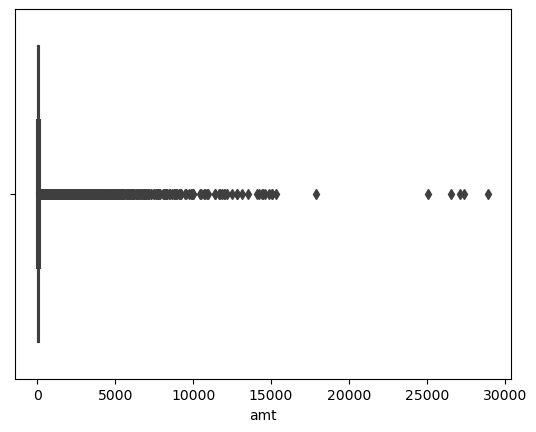

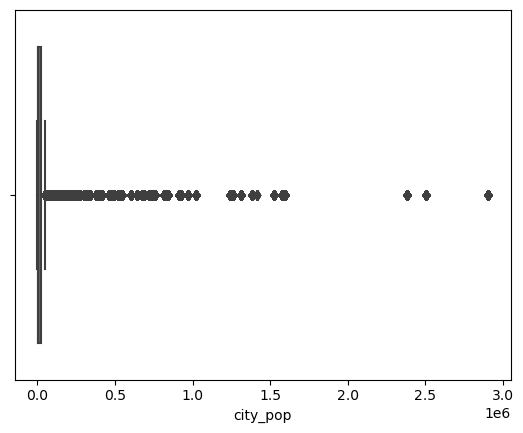

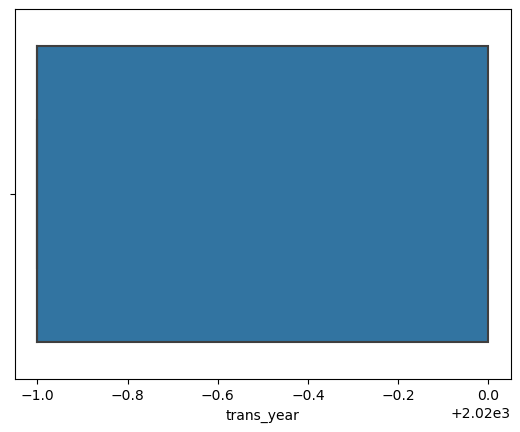

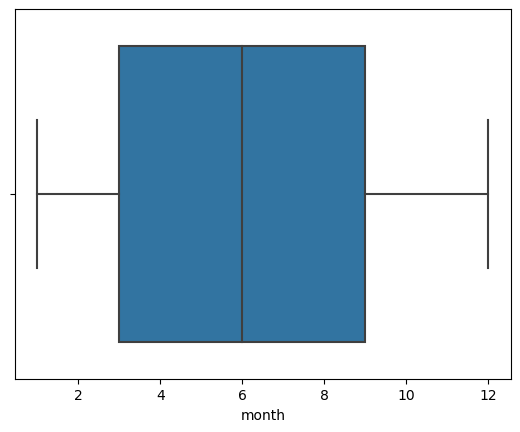

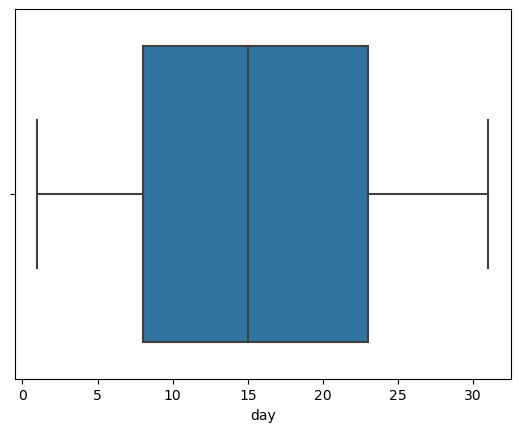

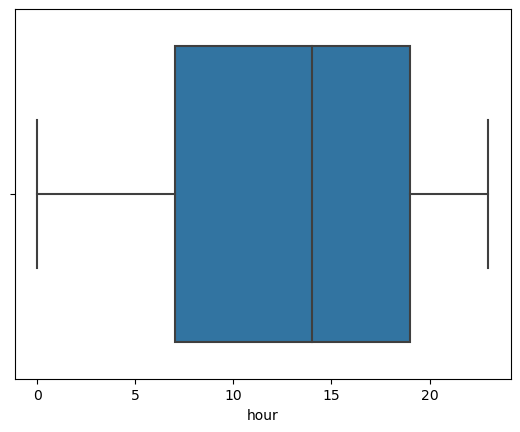

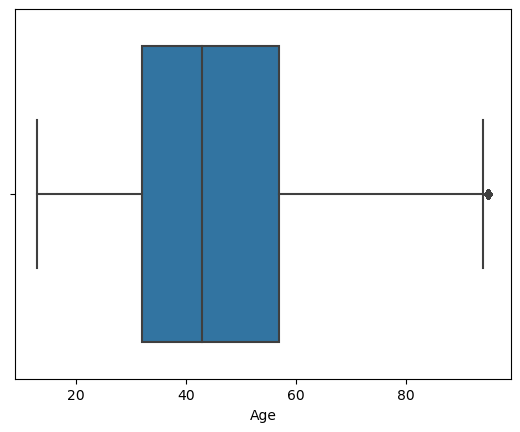

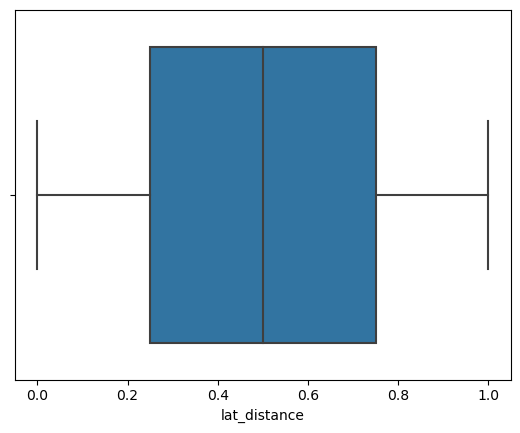

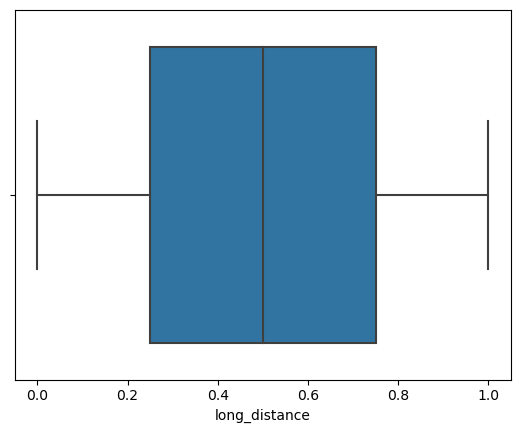

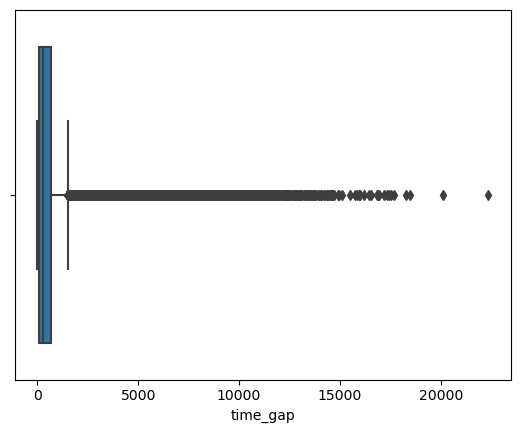

In [88]:
def outliers(col):
    sns.boxplot(data=X_train, x=col)
    plt.show()
    
for i in range(len(train_num_cols)):
    outliers(X_train[train_num_cols[i]])

In [89]:
# Outliers are present in three columns of training dataset: amt, city_pop and time_gap

##### Outliers in test dataset

In [90]:
test_num_cols = list(X_test.select_dtypes(exclude="object").columns)
test_num_cols

['amt',
 'city_pop',
 'trans_year',
 'month',
 'day',
 'hour',
 'Age',
 'lat_distance',
 'long_distance',
 'time_gap']

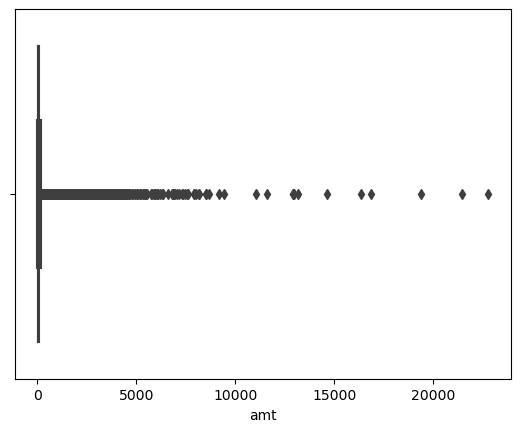

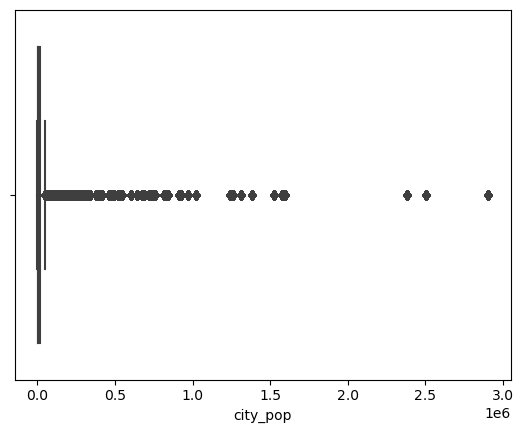

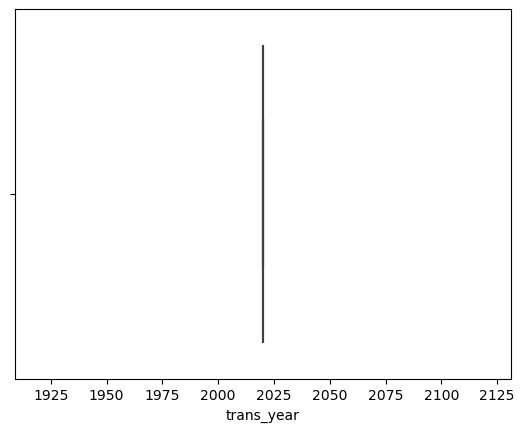

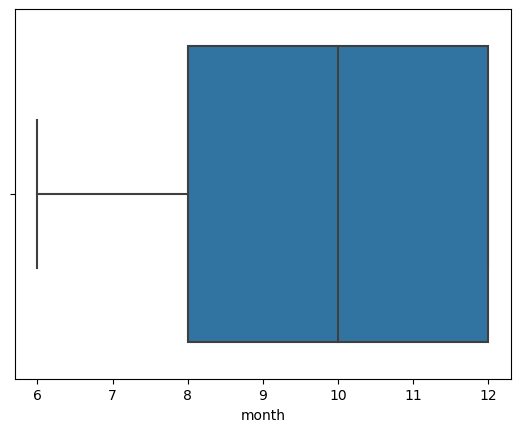

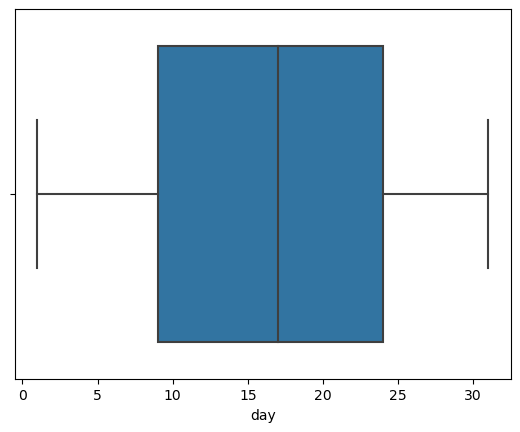

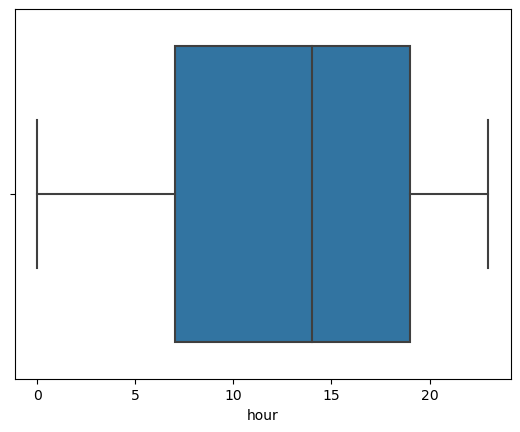

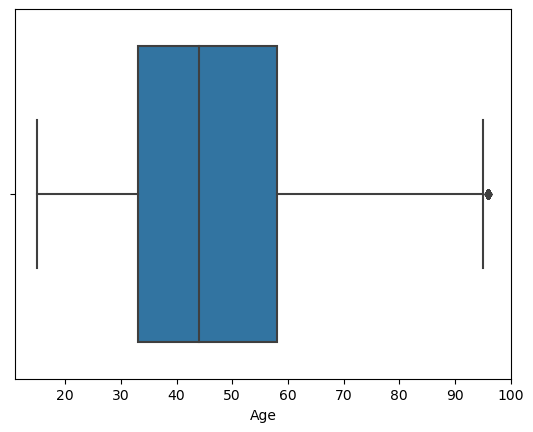

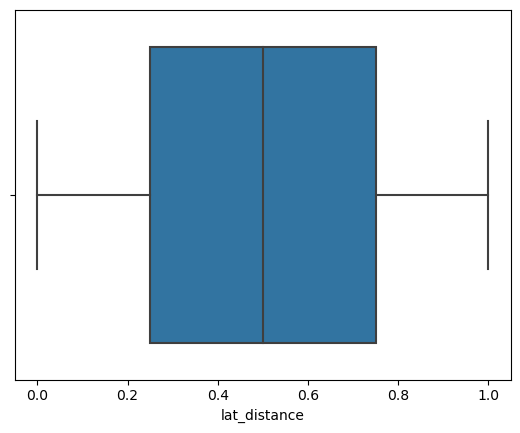

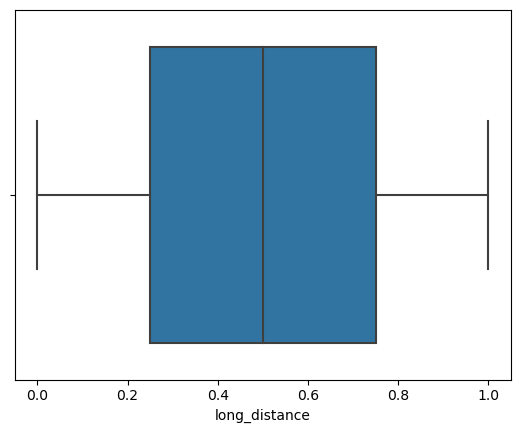

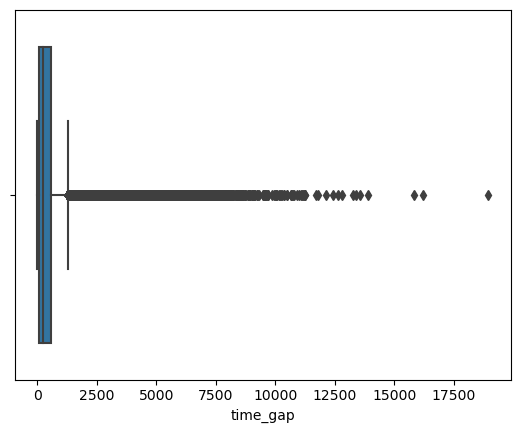

In [91]:
def outliers(col):
    sns.boxplot(data=X_test, x=col)
    plt.show()
    
for i in range(len(test_num_cols)):
    outliers(X_test[test_num_cols[i]])

In [92]:
# Similarly, Outliers are present in three columns of test dataset: amt, city_pop and time_gap

### Encoding

In machine learning, one-hot encoding is a frequently used method to deal with categorical data. Categorical data can be either nominal or ordinal.One-hot encoding is often applied to nominal variables, in order to improve the performance of the algorithm.

For each unique value in the original categorical column, a new column is created in this method. These dummy variables are then filled up with zeros and ones (1 meaning TRUE, 0 meaning FALSE).

In [93]:
# Applying one-hot encoding on nominal features on both train and test datasets

X_train = pd.get_dummies(data = X_train, columns = ["gender", "category", "trans_year"], drop_first=True)

X_test = pd.get_dummies(data = X_test, columns = ["gender", "category"], drop_first=True)
X_test = pd.get_dummies(data = X_test, columns = ["trans_year"])  # has only one value

In [94]:
# Encoding cyclical features

In [95]:
def encode(data, col, max_val):
    data[col + '_sin'] = np.sin(2 * np.pi * data[col]/max_val)
    data[col + '_cos'] = np.cos(2 * np.pi * data[col]/max_val)
    return data

In [96]:
X_train = encode(X_train, 'month', 12)
X_train = encode(X_train, 'day', 31)
X_train = encode(X_train, 'hour', 24)

In [97]:
X_test = encode(X_test, 'month', 12)
X_test = encode(X_test, 'day', 31)
X_test = encode(X_test, 'hour', 24)

##### Dropping unnecessary features

In [98]:
X_train.drop(columns=["month", "day", "hour"], axis=1, inplace=True)

X_test.drop(columns=["month", "day", "hour"], axis=1, inplace=True)

### Handling data imbalance

In [99]:
train_data.is_fraud.value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [100]:
# As we have already seen above that data is highly imbalanced. In this situation, the trained classifier often 
# becomes biased towards the majority label class and tends to miss the minority class. This will be an issue in cases 
# where we want to detect that minority class, for example, whether a transaction is fraudulent or legitimate
# (in current scenario). Therefore, it is important to handle such imbalanced dataset.

In [101]:
# Using SMOTE technique to handle imbalanced dataset.

x_train_bal, y_train_bal = SMOTE().fit_resample(X_train,y_train)

In [102]:
y_train_bal.value_counts()

0    1289169
1    1289169
Name: is_fraud, dtype: int64

In [103]:
# Now, the data has become balanced with equal number of values for each class.

### Scaling the training and test dataset separately

In [104]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(x_train_bal)
X_test_scaled = scaler.transform(X_test)

In [105]:
X_train_df = pd.DataFrame(X_train_scaled, columns = x_train_bal.columns)

##### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<h1><center><b><td>Model Building</td></b></center></h1>
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## <i>1. Logistic Regression</i>

In [106]:
# training the model
logreg = LogisticRegression(random_state=30)
logreg.fit(X_train_scaled, y_train_bal)

# predicting
y_pred = logreg.predict(X_test_scaled)
y_pred_train = logreg.predict(X_train_scaled)

# results- Classification report
print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred))
print('For train data')
print('-'*60)
print(classification_report(y_train_bal,y_pred_train))

For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    553574
           1       0.08      0.66      0.15      2145

    accuracy                           0.97    555719
   macro avg       0.54      0.82      0.57    555719
weighted avg       1.00      0.97      0.98    555719

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.93      0.93   1289169
           1       0.93      0.92      0.93   1289169

    accuracy                           0.93   2578338
   macro avg       0.93      0.93      0.93   2578338
weighted avg       0.93      0.93      0.93   2578338



In [107]:
# Confusion matrix
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[537974  15600]
 [   725   1420]]


In [108]:
# Precision, Recall and f1 Score

print(f"Precision Score : {precision_score(y_test,y_pred)}")
print(f"Recall Score : {recall_score(y_test,y_pred)}")
print(f"f1 Score : {f1_score(y_test,y_pred)}")

Precision Score : 0.08343125734430082
Recall Score : 0.662004662004662
f1 Score : 0.14818679885207411


## <i>2. Decision Tree</i>

In [109]:
# training the model
dt = DecisionTreeClassifier(random_state=30)
dt.fit(X_train_scaled, y_train_bal)

# predicting
y_predd = dt.predict(X_test_scaled)
y_predd_train=dt.predict(X_train_scaled)

# results - classification report
print('For test data')
print('-'*60)
print(classification_report(y_test,y_predd))
print('For train data')
print('-'*60)
print(classification_report(y_train_bal,y_predd_train))


For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.51      0.74      0.60      2145

    accuracy                           1.00    555719
   macro avg       0.75      0.87      0.80    555719
weighted avg       1.00      1.00      1.00    555719

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00   1289169

    accuracy                           1.00   2578338
   macro avg       1.00      1.00      1.00   2578338
weighted avg       1.00      1.00      1.00   2578338



In [110]:
# Confusion matrix
matrix = confusion_matrix(y_test,y_predd)
print(matrix)

[[552031   1543]
 [   552   1593]]


In [111]:
# Precision, Recall and f1 Score

print(f"Precision Score : {precision_score(y_test,y_predd)}")
print(f"Recall Score : {recall_score(y_test,y_predd)}")
print(f"f1 Score : {f1_score(y_test,y_predd)}")

Precision Score : 0.5079719387755102
Recall Score : 0.7426573426573426
f1 Score : 0.6032948305245218


## <i>3. Random Forest</i>

In [112]:
# training the model
rfc = RandomForestClassifier(random_state=30)
rfc.fit(X_train_scaled,y_train_bal)

#predicting
y_pred = rfc.predict(X_test_scaled)
y_pred_train = rfc.predict(X_train_scaled)

# results- classification report
print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred))
print('For train data')
print('-'*60)
print(classification_report(y_train_bal,y_pred_train))

For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.86      0.71      0.77      2145

    accuracy                           1.00    555719
   macro avg       0.93      0.85      0.89    555719
weighted avg       1.00      1.00      1.00    555719

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00   1289169

    accuracy                           1.00   2578338
   macro avg       1.00      1.00      1.00   2578338
weighted avg       1.00      1.00      1.00   2578338



In [113]:
# Confusion matrix
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[553321    253]
 [   629   1516]]


In [114]:
# Precision, Recall and f1 Score

print(f"Precision Score : {precision_score(y_test,y_pred)}")
print(f"Recall Score : {recall_score(y_test,y_pred)}")
print(f"f1 Score : {f1_score(y_test,y_pred)}")

Precision Score : 0.8569813453928773
Recall Score : 0.7067599067599067
f1 Score : 0.7746550843127236


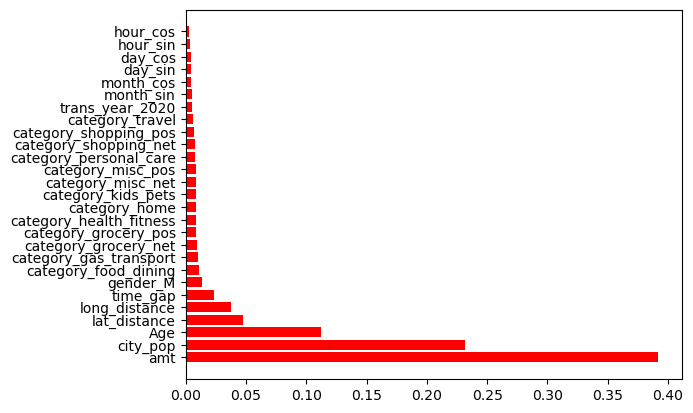

In [115]:
# checking importance of each feature 
feature_scores = pd.Series(rfc.feature_importances_, index=X_train_df.columns).sort_values(ascending=False)

plt.barh(X_train_df.columns, feature_scores, color = 'red')
plt.show()

- Features like category, gender and cyclical features: year, months, day, hour have least importance in predicting target variable.

## <i>4. Gradient Boosting</i>

In [116]:
gdb = GradientBoostingClassifier(random_state=30)
gdb.fit(X_train_scaled,y_train_bal)

y_pred = gdb.predict(X_test_scaled)
y_pred_train = gdb.predict(X_train_scaled)

 
print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred))
print('For train data')
print('-'*60)
print(classification_report(y_train_bal,y_pred_train))

For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.20      0.80      0.33      2145

    accuracy                           0.99    555719
   macro avg       0.60      0.90      0.66    555719
weighted avg       1.00      0.99      0.99    555719

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97   1289169
           1       0.99      0.96      0.97   1289169

    accuracy                           0.97   2578338
   macro avg       0.97      0.97      0.97   2578338
weighted avg       0.97      0.97      0.97   2578338



In [117]:
# Confusion matrix
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[546879   6695]
 [   422   1723]]


In [118]:
# Precision, Recall and f1 Score

print(f"Precision Score : {precision_score(y_test,y_pred)}")
print(f"Recall Score : {recall_score(y_test,y_pred)}")
print(f"f1 Score : {f1_score(y_test,y_pred)}")

Precision Score : 0.20468044666191496
Recall Score : 0.8032634032634033
f1 Score : 0.3262330777241314


## <i>5. Ada Boost Classifier</i>

In [119]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(random_state=30)
adb.fit(X_train_scaled,y_train_bal)

y_pred = adb.predict(X_test_scaled)
y_pred_train = adb.predict(X_train_scaled)


print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred))
print('For train data')
print('-'*60)
print(classification_report(y_train_bal,y_pred_train))

For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    553574
           1       0.24      0.68      0.36      2145

    accuracy                           0.99    555719
   macro avg       0.62      0.84      0.68    555719
weighted avg       1.00      0.99      0.99    555719

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.97   1289169
           1       0.98      0.97      0.97   1289169

    accuracy                           0.97   2578338
   macro avg       0.97      0.97      0.97   2578338
weighted avg       0.97      0.97      0.97   2578338



In [120]:
# Confusion matrix
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[549002   4572]
 [   681   1464]]


In [121]:
# Precision, Recall and f1 Score

print(f"Precision Score : {precision_score(y_test,y_pred)}")
print(f"Recall Score : {recall_score(y_test,y_pred)}")
print(f"f1 Score : {f1_score(y_test,y_pred)}")

Precision Score : 0.24254473161033796
Recall Score : 0.6825174825174826
f1 Score : 0.3579024569123579


## <i>6. XG Boost</i>

In [122]:
xgb= XGBClassifier(random_state=30)
xgb.fit(X_train_scaled,y_train_bal)

y_pred = xgb.predict(X_test_scaled)
y_pred_train = xgb.predict(X_train_scaled)


print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred))
print('For train data')
print('-'*60)
print(classification_report(y_train_bal,y_pred_train))


For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.78      0.79      0.79      2145

    accuracy                           1.00    555719
   macro avg       0.89      0.89      0.89    555719
weighted avg       1.00      1.00      1.00    555719

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00   1289169

    accuracy                           1.00   2578338
   macro avg       1.00      1.00      1.00   2578338
weighted avg       1.00      1.00      1.00   2578338



In [123]:
# Confusion matrix
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[553108    466]
 [   449   1696]]


In [124]:
# Precision, Recall and f1 Score

print(f"Precision Score : {precision_score(y_test,y_pred)}")
print(f"Recall Score : {recall_score(y_test,y_pred)}")
print(f"f1 Score : {f1_score(y_test,y_pred)}")

Precision Score : 0.7844588344125809
Recall Score : 0.7906759906759907
f1 Score : 0.7875551427908057


## <i>7. Naive Bayes</i>

In [126]:
nb = GaussianNB()
nb.fit(X_train_scaled,y_train_bal)

y_pred = nb.predict(X_test_scaled)
y_pred_train = nb.predict(X_train_scaled)


print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred))
print('For train data')
print('-'*60)
print(classification_report(y_train_bal,y_pred_train))

For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.71      0.83    553574
           1       0.01      0.71      0.02      2145

    accuracy                           0.71    555719
   macro avg       0.50      0.71      0.42    555719
weighted avg       0.99      0.71      0.83    555719

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.69      0.80   1289169
           1       0.75      0.96      0.84   1289169

    accuracy                           0.82   2578338
   macro avg       0.85      0.82      0.82   2578338
weighted avg       0.85      0.82      0.82   2578338



In [127]:
# Confusion matrix
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[393140 160434]
 [   616   1529]]


In [128]:
# Precision, Recall and f1 Score

print(f"Precision Score : {precision_score(y_test,y_pred)}")
print(f"Recall Score : {recall_score(y_test,y_pred)}")
print(f"f1 Score : {f1_score(y_test,y_pred)}")

Precision Score : 0.009440427752017436
Recall Score : 0.7128205128205128
f1 Score : 0.018634070246423086


<h1><center><b><td>Cross - Validation</td></b></center></h1>

A technique for validating the model efficiency by training it on the subset of input data and testing on previously unseen subset of the input data.

In [129]:
# Function to find out mean of cross-validation scores

def cv(model):
    acc_scores = cross_val_score(model, X_train_scaled, y_train_bal, cv=3)
    Mean_accuracy_score = acc_scores.mean()
    
    prec_scores = cross_val_score(model, X_train_scaled, y_train_bal, cv=3, scoring="precision")
    Mean_precision_score = prec_scores.mean()
    
    rec_scores = cross_val_score(model, X_train_scaled, y_train_bal, cv=3, scoring="recall")
    Mean_recall_score = rec_scores.mean()
    
    f1_scores = cross_val_score(model,X_train_scaled, y_train_bal, cv=3, scoring="f1")
    Mean_f1_score = f1_scores.mean()
    
    return (round(Mean_accuracy_score, 3)), (round(Mean_precision_score,3)), (round(Mean_recall_score,3)), (round(Mean_f1_score,3))

##### 1. Logistic Regression

In [130]:
logreg = LogisticRegression(random_state = 11).fit(X_train_scaled, y_train_bal)
lr_accuracy, lr_precision, lr_recall, lr_f1 = cv(logreg)
lr_results = {'Accuracy Score':lr_accuracy, 'Precision_Score':lr_precision, 'Recall_score':lr_recall, 'f1_Score':lr_f1}
print(lr_results)

{'Accuracy Score': 0.926, 'Presion_Score': 0.928, 'Recall_score': 0.923, 'f1_Score': 0.926}


##### 2. Decision Tree

In [131]:
dt = DecisionTreeClassifier(random_state = 11).fit(X_train_scaled, y_train_bal)
dt_accuracy, dt_precision, dt_recall, dt_f1 = cv(dt)
dt_results = {'Accuracy Score':dt_accuracy, 'Precision_Score':dt_precision, 'Recall_score':dt_recall, 'f1_Score':dt_f1}
print(dt_results)

{'Accuracy Score': 0.996, 'Presion_Score': 0.994, 'Recall_score': 0.997, 'f1_Score': 0.996}


##### 3. Random Forest

In [133]:
rfc = RandomForestClassifier().fit(X_train_scaled, y_train_bal)
rfc_accuracy, rfc_precision, rfc_recall, rfc_f1 = cv(rfc)
rfc_results = {'Accuracy Score':rfc_accuracy, 'Precision_Score':rfc_precision, 'Recall_score':rfc_recall, 'f1_Score':rfc_f1}
print(rfc_results)

{'Accuracy Score': 0.999, 'Precision_Score': 0.999, 'Recall_score': 0.999, 'f1_Score': 0.999}


##### 4. Gradient boosting

In [134]:
gdb = GradientBoostingClassifier().fit(X_train_scaled, y_train_bal)
gdb_accuracy, gdb_precision, gdb_recall, gdb_f1 = cv(gdb)
gdb_results = {'Accuracy Score':gdb_accuracy, 'Precision_Score':gdb_precision, 'Recall_score':gdb_recall, 'f1_Score':gdb_f1}
print(gdb_results)

{'Accuracy Score': 0.974, 'Precision_Score': 0.985, 'Recall_score': 0.962, 'f1_Score': 0.973}


##### 7. Ada Boost

In [136]:
adb = AdaBoostClassifier(random_state=30).fit(X_train_scaled, y_train_bal)
adb_accuracy, adb_precision, adb_recall, adb_f1 = cv(adb)
adb_results = {'Accuracy Score':adb_accuracy, 'Precision_Score':adb_precision, 'Recall_score':adb_recall, 'f1_Score':adb_f1}
print(adb_results)

{'Accuracy Score': 0.974, 'Precision_Score': 0.98, 'Recall_score': 0.969, 'f1_Score': 0.974}


##### 8. XG Boost

In [137]:
xgb = XGBClassifier().fit(X_train_scaled, y_train_bal)
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = cv(xgb)
xgb_results = {'Accuracy Score':xgb_accuracy, 'Precision_Score':xgb_precision, 'Recall_score':xgb_recall, 'f1_Score':xgb_f1}
print(xgb_results)

{'Accuracy Score': 0.999, 'Precision_Score': 0.999, 'Recall_score': 0.999, 'f1_Score': 0.999}


##### 9. Naive Bayes

In [138]:
nb = GaussianNB().fit(X_train_scaled, y_train_bal)
nb_accuracy, nb_precision, nb_recall, nb_f1 = cv(nb)
nb_results = {'Accuracy Score':nb_accuracy, 'Precision_Score':nb_precision, 'Recall_score':nb_recall, 'f1_Score':nb_f1}
print(nb_results)

{'Accuracy Score': 0.822, 'Precision_Score': 0.754, 'Recall_score': 0.957, 'f1_Score': 0.844}


<h1><center><b><td>Performance Evaluation</td></b></center></h1>

In [139]:
data = [['Logistic Regression', lr_accuracy, lr_precision, lr_recall, lr_f1], 
       ['Decision Tree', dt_accuracy, dt_precision, dt_recall, dt_f1],
       ['Random Forest', rfc_accuracy, rfc_precision, rfc_recall, rfc_f1],
       ['Gradient boosting', gdb_accuracy, gdb_precision, gdb_recall, gdb_f1],
       ['Ada Boost Classifier', adb_accuracy, adb_precision, adb_recall, adb_f1],
       ['XG Boost', xgb_accuracy, xgb_precision, xgb_recall, xgb_f1],
       ['Naive Bayes', nb_accuracy, nb_precision, nb_recall, nb_f1]]

model_performance = pd.DataFrame(data, columns=["Models", "Accuracy", "Precision", "Recall", "f1"])

###### Highlighting best scores 

In [140]:
#define function for values greater than 83%
def cond_formatting(x):
    if x > 0.99:
        return 'background-color: lightgreen'
    else:
        return None

#define function for highlighting max values
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

#display DataFrame with conditional formatting applied    

model_performance.style.\
    applymap(cond_formatting, subset = ["Accuracy", "Precision", "Recall", "f1"]).\
    apply(highlight_max, subset = ["Accuracy", "Precision", "Recall", "f1"])

,Models,Accuracy,Precision,Recall,f1
0,Logistic Regression,0.926000,0.928000,0.923000,0.926000
1,Decision Tree,0.996000,0.994000,0.997000,0.996000
2,Random Forest,0.999000,0.999000,0.999000,0.999000
3,Gradient boosting,0.974000,0.985000,0.962000,0.973000
4,Ada Boost Classifier,0.974000,0.980000,0.969000,0.974000
5,XG Boost,0.999000,0.999000,0.999000,0.999000
6,Naive Bayes,0.822000,0.754000,0.957000,0.844000


**Cells highlighted with:**
- green color shows the values greater than 99% and 
- yellow color shows the max values.

#### Best-Performing Models: 
- XG Boost and Random Forest 

- Both the models give same result but are over-fitting also.Therefore, we need to tune the parameters for optimal results.

<h1><center><b><td>Hyper-Parameter Tuning </td></b></center></h1>

A technique to tweak the parameters of the model for optimal results.

In [141]:
# Function to find out best parameters using Grid Search CV

def classifier(model, param_grid):
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring = "accuracy")
    grid_search.fit(X_train_scaled, y_train_bal)
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)    

## 1. Random Forest

In [142]:
#### using random search cv first to narrow down the search of optimal parameters

In [143]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 150, stop = 2000, num = 10)]
# # Number of features to consider at every split
max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num = 6)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
bootstrap = [True, False]
# # Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [150, 355, 561, 766, 972, 1177, 1383, 1588, 1794, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [146]:
## Trying random parameters

In [148]:
# training the model by setting max_depth to 20 to reduce overfitting
rfc = RandomForestClassifier(max_depth = 20, random_state=30)
rfc.fit(X_train_scaled, y_train_bal)

#predicting
y_pred = rfc.predict(X_test_scaled)
y_pred_train = rfc.predict(X_train_scaled)

# results- classification report
print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred))
print('For train data')
print('-'*60)
print(classification_report(y_train_bal,y_pred_train))

For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.54      0.77      0.63      2145

    accuracy                           1.00    555719
   macro avg       0.77      0.88      0.82    555719
weighted avg       1.00      1.00      1.00    555719

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1289169
           1       1.00      1.00      1.00   1289169

    accuracy                           1.00   2578338
   macro avg       1.00      1.00      1.00   2578338
weighted avg       1.00      1.00      1.00   2578338



In [149]:
# The problem of overfitting still persists. Trying to further reduce max_depth

In [150]:
# training the model
rfc = RandomForestClassifier(max_depth = 12, min_samples_split=4, random_state=30)
rfc.fit(X_train_scaled, y_train_bal)

#predicting
y_pred = rfc.predict(X_test_scaled)
y_pred_train = rfc.predict(X_train_scaled)

# results- classification report
print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred))
print('For train data')
print('-'*60)
print(classification_report(y_train_bal,y_pred_train))

For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.25      0.82      0.38      2145

    accuracy                           0.99    555719
   macro avg       0.63      0.90      0.69    555719
weighted avg       1.00      0.99      0.99    555719

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98   1289169
           1       0.99      0.98      0.98   1289169

    accuracy                           0.98   2578338
   macro avg       0.98      0.98      0.98   2578338
weighted avg       0.98      0.98      0.98   2578338



In [151]:
# training the model
rfc = RandomForestClassifier(max_depth = 6, min_samples_split=4, n_estimators = 150, random_state=30)
rfc.fit(X_train_scaled, y_train_bal)

#predicting
y_pred = rfc.predict(X_test_scaled)
y_pred_train = rfc.predict(X_train_scaled)

# results- classification report
print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred))
print('For train data')
print('-'*60)
print(classification_report(y_train_bal,y_pred_train))

For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    553574
           1       0.08      0.83      0.15      2145

    accuracy                           0.96    555719
   macro avg       0.54      0.90      0.57    555719
weighted avg       1.00      0.96      0.98    555719

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.96      0.94   1289169
           1       0.96      0.92      0.94   1289169

    accuracy                           0.94   2578338
   macro avg       0.94      0.94      0.94   2578338
weighted avg       0.94      0.94      0.94   2578338



##### In an attempt to reduce the problem of overfitting, we have to bear the reduction in precision and f1 score as well. Though recall score has improved from 0.77 to 0.83 but the precision score and f1 score got terribly reduced to 0.08 and 0.15 respectively.

## 2. XG Boost

In [152]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
# # Number of features to consider at every split
learning_rate = [0.1, 0.01, 0.001, 1] 
# # Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 60, num = 6)]
max_depth.append(None)

# # Method of selecting samples for training each tree
subsample = [0.3, 0.5, 0.7, 1]
# # Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'learning_rate': [0.1, 0.01, 0.001, 1], 'max_depth': [10, 20, 30, 40, 50, 60, None], 'subsample': [0.3, 0.5, 0.7, 1]}


In [153]:
# Trying to reduce overfitting

In [154]:
xgb= XGBClassifier(max_depth = 10, learning_rate = 0.01, subsample= 0.5, random_state = 30)
xgb.fit(X_train_scaled ,y_train_bal)

y_pred = xgb.predict(X_test_scaled)
y_pred_train = xgb.predict(X_train_scaled)


print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred))
print('For train data')
print('-'*60)
print(classification_report(y_train_bal,y_pred_train))


For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    553574
           1       0.25      0.87      0.38      2145

    accuracy                           0.99    555719
   macro avg       0.62      0.93      0.69    555719
weighted avg       1.00      0.99      0.99    555719

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99   1289169
           1       0.99      0.98      0.99   1289169

    accuracy                           0.99   2578338
   macro avg       0.99      0.99      0.99   2578338
weighted avg       0.99      0.99      0.99   2578338



In [155]:
xgb= XGBClassifier(max_depth = 8, learning_rate = 0.01, subsample= 0.5, random_state = 30)
xgb.fit(X_train_scaled ,y_train_bal)

y_pred = xgb.predict(X_test_scaled)
y_pred_train = xgb.predict(X_train_scaled)


print('For test data')
print('-'*60)
print(classification_report(y_test,y_pred))
print('For train data')
print('-'*60)
print(classification_report(y_train_bal,y_pred_train))


For test data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    553574
           1       0.18      0.85      0.30      2145

    accuracy                           0.98    555719
   macro avg       0.59      0.92      0.64    555719
weighted avg       1.00      0.98      0.99    555719

For train data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.97      0.98      0.98   1289169
           1       0.98      0.97      0.98   1289169

    accuracy                           0.98   2578338
   macro avg       0.98      0.98      0.98   2578338
weighted avg       0.98      0.98      0.98   2578338



##### XG Boost model has also shown similar implications leading precision score to as low as 0.18 and f1 score to 0.30. Likewise, Recall score has improved to 0.85. 

<h1><center><b><td>Final Performance Evaluation</td></b></center></h1>

<h2><center><b><td>Confusion Matrix: Comparison</td></b></center></h2>

##### 1. Random Forest

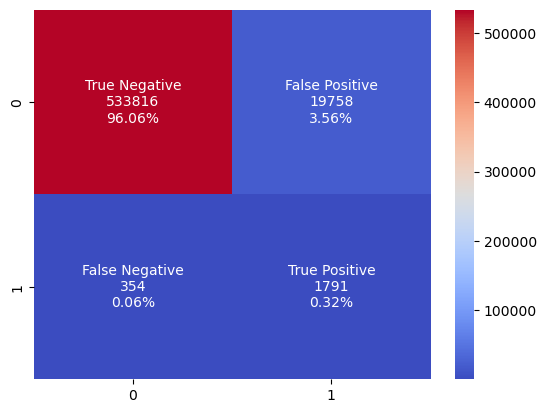

In [162]:
# # Printing Confusion matrix of tuned Random forest model
y_pred = rfc.predict(X_test_scaled)
rf_matrix = confusion_matrix(y_test,y_pred)

group_names = ['True Negative' ,'False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in rf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in rf_matrix.flatten()/np.sum(rf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# # visualizing in heatmap
sns.heatmap(rf_matrix, annot=labels, fmt='', cmap='coolwarm')
plt.show()

##### 2. XG Boost

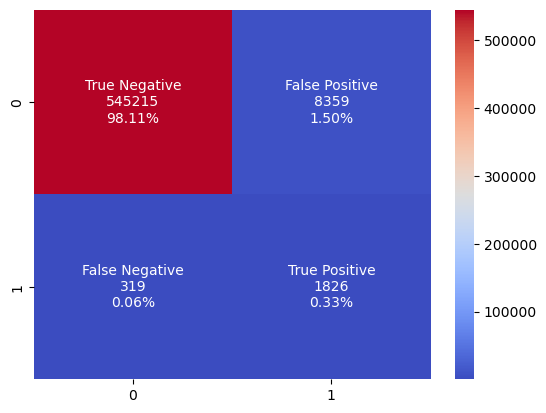

In [163]:
# # Confusion matrix
y_pred = xgb.predict(X_test_scaled)
xgb_matrix = confusion_matrix(y_test,y_pred)

group_names = ['True Negative' ,'False Positive','False Negative','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in xgb_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in xgb_matrix.flatten()/np.sum(xgb_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(xgb_matrix, annot=labels, fmt='', cmap='coolwarm')
plt.show()

In [158]:
# Though both the models have performed terribly in terms of "True Positive", XG Boost has performed slightly better.
# Overall, XG Boost has performed better than Random Forest.

<h2><center><b><td>ROC-AUC Curves: Comparison</td></b></center></h2>

The ROC AUC score tells us how efficient the model is. The higher the AUC, the better the model's performance at distinguishing between the positive and negative classes.

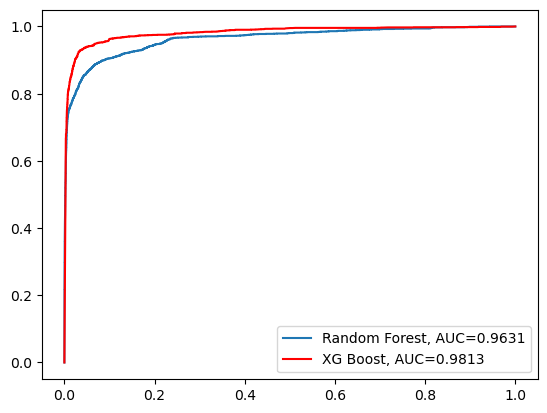

In [164]:
#set up plotting area
plt.figure(0).clf()

#plotting ROC curve of tuned random forest model
y_pred_rf = rfc.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_rf)
auc = round(roc_auc_score(y_test, y_pred_rf), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc))

# plotting ROC curve of tuned xgboost model
y_pred_xgb = xgb.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_xgb)
auc = round(roc_auc_score(y_test, y_pred_xgb), 4)
plt.plot(fpr,tpr,label="XG Boost, AUC="+str(auc), color= 'red')

#add legends
plt.legend()
plt.show()

In [160]:
# AUC score of Random Forest is around 0.96. On ther other hand, XG Boost has generated an accuracy score of 0.98. 
# Therefore, XG Boost has performed better.